# Problem 1

*Read and understand the posted solution to HW 8.  The goal here is to see another solution besides your own, to get coding ideas, and to think about things that your or I could do better. Just state if you did this.*

# Problem 2

$\DeclareMathOperator{\sech}{sech}$
*The 1-D convection equation is written as:
$$\frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} = 0,$$
where $c$ is the wave speed.  We will solve this PDE on the x-domain from x=0 to x=13 with periodic boundary conditions.  The problem will be solved for one "flow through" time.*  

*A periodic boundary is one in which the point after the last point in the list is the same as the first point in the list:*  

    [*]  *  *  *  *  *  *  *  []
     0   1  2  3  4  5  6  7  
    
*Here, grid points are denoted by asterisks.  The brackets denote equivalent spatial locations (think of a circle, no beginning and no end).  Periodic boundaries are easy to implement.  For instance, suppose we wanted to evaluate $dy/dx$ at point 0 using a central difference.  Then $dy/dx\approx(y_1-y_7)/2\Delta x$.  In Python, if you wanted to evaluate $dy/dx$ at every grid point using a central difference, you could do this easily using an index array:*
   
    i          = np.arange(ngrid)
    iplus1     = i + 1
    iplus1[-1] = 0                 # wrap around the periodic
    iminus1    = i - 1
    iminus1[0] = ngrid-1           # wrap around the periodic 
    # so, i       = [0, 1, 2, 3, 4, 5, 6, 7]
    #     iplus1  = [1, 2, 3, 4, 5, 6, 7, 0]
    #     iminus1 = [7, 0, 1, 2, 3, 4, 5, 6]
    dydx = (y[iplus1] - y[iminus1])/2/\Delta x
    
*You should use the following initial condition in the code below.  This gives four peaked reagions with domains (of x): [0,4], [4,6], [7,9], [10,12].  
The functions on these regions are* 
* $u=\sech(8x-2)$, 
* $u = 1-(x-5)^2$, 
* a triangle with a peak of $u=1$ at $x=8$ and a base with $u=0$ at $x=7$ and $x=9$, and 
* a tophat with $u=1$, respectively.

Solve the problem using the upwind, second order upwind, and Lax Wendroff methods. Compare the results graphically at the final time. Include the exact solution at the final time (which is just the initial condition). I recommend just using a single code and stepping three different versions of the solution (in three different arrays), then plot your three methods on one graph.

You should vary the CFL and the grid size. You can verify your code by checking against a CFL of 1. Use CFL=0.3, 0.5, 0.7, and 0.9 with 100 grid points, and use CFL=0.9 with N=50, 100, 300, and 500 grid points. You will have 8 plots.

Comment on which method you would use and why.

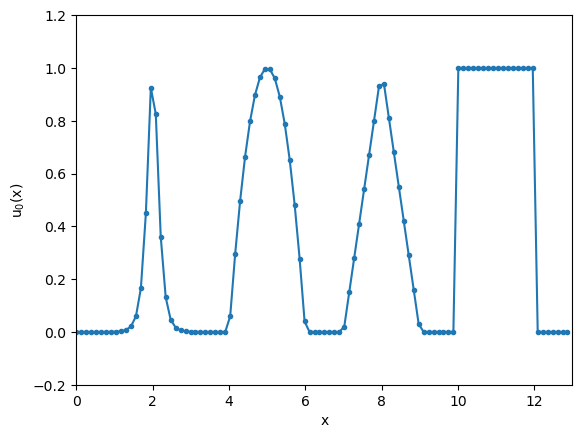

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

Ld  = 13.0
nx  = 100
c   = 1.0
cfl = 0.9

dx = Ld/nx     # not Ld/(nx-1)
x = np.linspace(0.0, Ld-dx, nx)

u0 = np.zeros(nx)

i = np.where((x>=0) & (x<=4));   u0[i] = 1.0/(np.cosh(8.0*(x[i]-2.0)))
i = np.where((x>=4) & (x<=6));   u0[i] = 1.0-(x[i]-5.0)**2.0
i = np.where((x>=7) & (x<=8));   u0[i] = x[i]-7.0
i = np.where((x>=8) & (x<=9));   u0[i] = 1.0-(x[i]-8.0)
i = np.where((x>=10)& (x<=12));  u0[i] = 1.0

plt.plot(x,u0,'.-')
plt.gca().set_xlim([0,13])
plt.gca().set_ylim([-0.2,1.2])
plt.xlabel('x')
plt.ylabel(r'u$_0$(x)');
